# Kruskal-Wallis Test
対応のない多群の平均値差について検定を行う。
後の検定でわかるように、各群の等分散性が認められないため、
検定方法としては、ANOVAではなく、Kruskal-Wallis Testを用いる。

In [1]:
# データの読み込み
df <- read.csv("data/kruskal_wallis.csv",header=TRUE,comment.char = "#")

In [7]:
# ざっくりとデータを眺める
head(df, 3)
by(df$b, df$a, summary)

toolid,a,b
214,200,4.96329
215,200,4.96329
216,200,7.33014


df$a: 200
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.950   2.478   3.789   4.177   4.963   7.330 
------------------------------------------------------------ 
df$a: 400
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.804   2.990   4.741   5.144   6.743  10.980 
------------------------------------------------------------ 
df$a: 800
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.70    8.80   14.90   18.12   24.90   45.40 
------------------------------------------------------------ 
df$a: 1200
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.30   15.80   26.60   32.12   39.60   58.20 

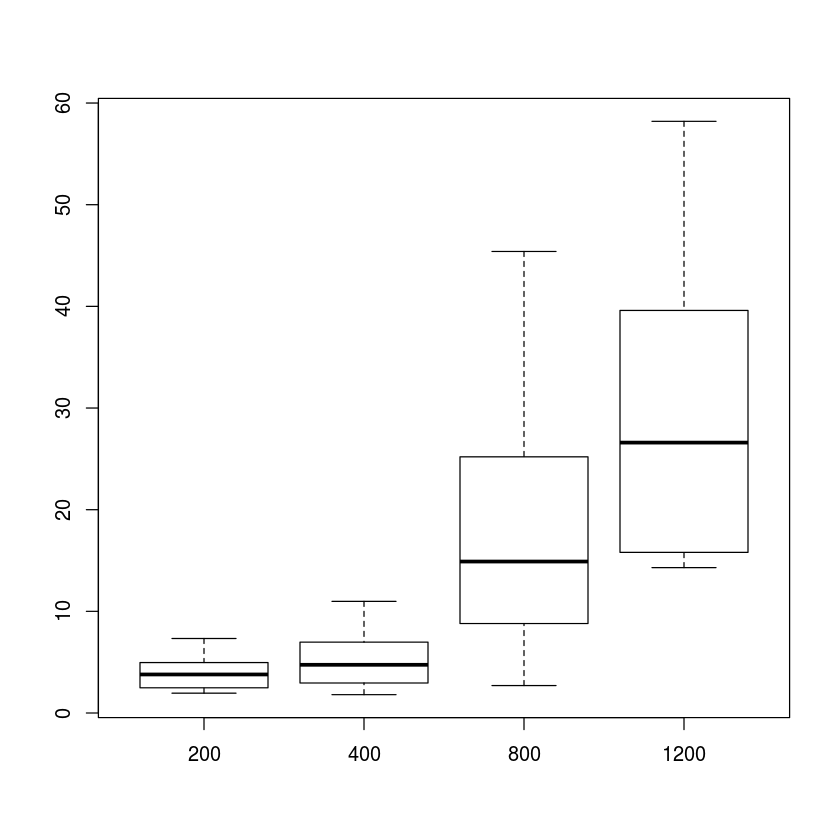

In [4]:
boxplot(b  ~ a, df)

分散性の確認をBartlet testで行う。
<br>等分散であればANOVA
<br>非等分散(異分散)であれば Kruskal-Wallis testを行う

# Bartlett test

```R
bartlet.test(検定変数 ~ 群変数, データフレーム名)
bartlet.test(データフレーム名[, 検定変数の列番号] ~ データフレーム名[, 群変数の列番号])
```
分散分析も等分散が前提なので、事前の検定が望ましい

## 仮説の考え方
帰無仮説 $\mathcal{H}_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ →　各群の母分散には差がない(等分散)

対立仮説 $\mathcal{H}_1: \sigma_1^2 \neq \sigma_2^2 \neq \sigma_3^2$ → 各群の母分散には1対以上で差がある(異分散)

## 検定統計量
$\chi^2$分布に従う「全群の分散の偏りの度合い」

In [5]:
bartlett.test(b ~ a, df)


	Bartlett test of homogeneity of variances

data:  b by a
Bartlett's K-squared = 66.248, df = 3, p-value = 2.713e-14


P値が0.05よりも小さいので、帰無仮説は棄却され、対立仮説を採択する。
つまり各群は異分散である。従って、bがaに影響を
与えたとしてよいかどうかの検定は、ノンパラメトリックで対応のない
多群の代表値の差の検定方法であるKruskal-Wallis testを用いる。

In [6]:
kruskal.test(b ~ a, df)


	Kruskal-Wallis rank sum test

data:  b by a
Kruskal-Wallis chi-squared = 40.362, df = 3, p-value = 8.928e-09


P値が0.05以下であるため、群間に差がある、つまりaの差が
bに効果があったと判断できる。
どの群間で差があったのかについては、多重比較法を用いて検討する必要あり。
多重比較法はどの方法を用いればよいのか、選択が難しい。本件の場合にどのような
手法を用いるか不明。今後の勉強としたい。